In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data Read

In [2]:
df = pd.read_csv('schedulingData.csv', sep = ',')

In [3]:
df.head()

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
0,E,997,137,20,0,14.000000,Tue,F
1,E,97,103,20,0,13.816667,Tue,VF
2,E,101,75,10,0,13.850000,Thu,VF
3,E,93,76,20,0,10.100000,Fri,VF
4,E,100,82,20,0,10.366667,Fri,VF


# EDA

In [4]:
#데이터 형태 확인
df.shape

(4331, 8)

In [5]:
#데이터 정보 확인 / null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 8 columns):
Protocol       4331 non-null object
Compounds      4331 non-null int64
InputFields    4331 non-null int64
Iterations     4331 non-null int64
NumPending     4331 non-null int64
Hour           4331 non-null float64
Day            4331 non-null object
Class          4331 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 270.8+ KB


In [6]:
#숫자형 변수에 대한 기초통계량 확인
df.describe()

,Compounds,InputFields,Iterations,NumPending,Hour
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,53.389287,13.733760
std,1020.173220,3650.076483,34.417441,355.956566,3.981058
min,20.000000,10.000000,10.000000,0.000000,0.016667
25%,98.000000,134.000000,20.000000,0.000000,10.900000
50%,226.000000,426.000000,20.000000,0.000000,14.016667
75%,448.000000,991.000000,20.000000,0.000000,16.600000
max,14103.000000,56671.000000,200.000000,5605.000000,23.983333


In [8]:
# 범주형 변수 확인
cat_cols = [col for col in df.columns[:] if df[col].dtype in ['O']]
df[cat_cols].describe()

,Protocol,Day,Class
count,4331,4331,4331
unique,14,7,4
top,J,Fri,VF
freq,989,923,2211


In [9]:
# 범주형 변수의 고유값 출력
for col in cat_cols:
    uniq = np.unique(df[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col,len(uniq),uniq))

--------------------------------------------------
# col Protocol, n_uniq 14, uniq ['A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
--------------------------------------------------
# col Day, n_uniq 7, uniq ['Fri' 'Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
--------------------------------------------------
# col Class, n_uniq 4, uniq ['F' 'L' 'M' 'VF']


In [10]:
%matplotlib inline
mpl.rcdefaults()

In [11]:
mpl.rcParams.update({'font.size': 15})

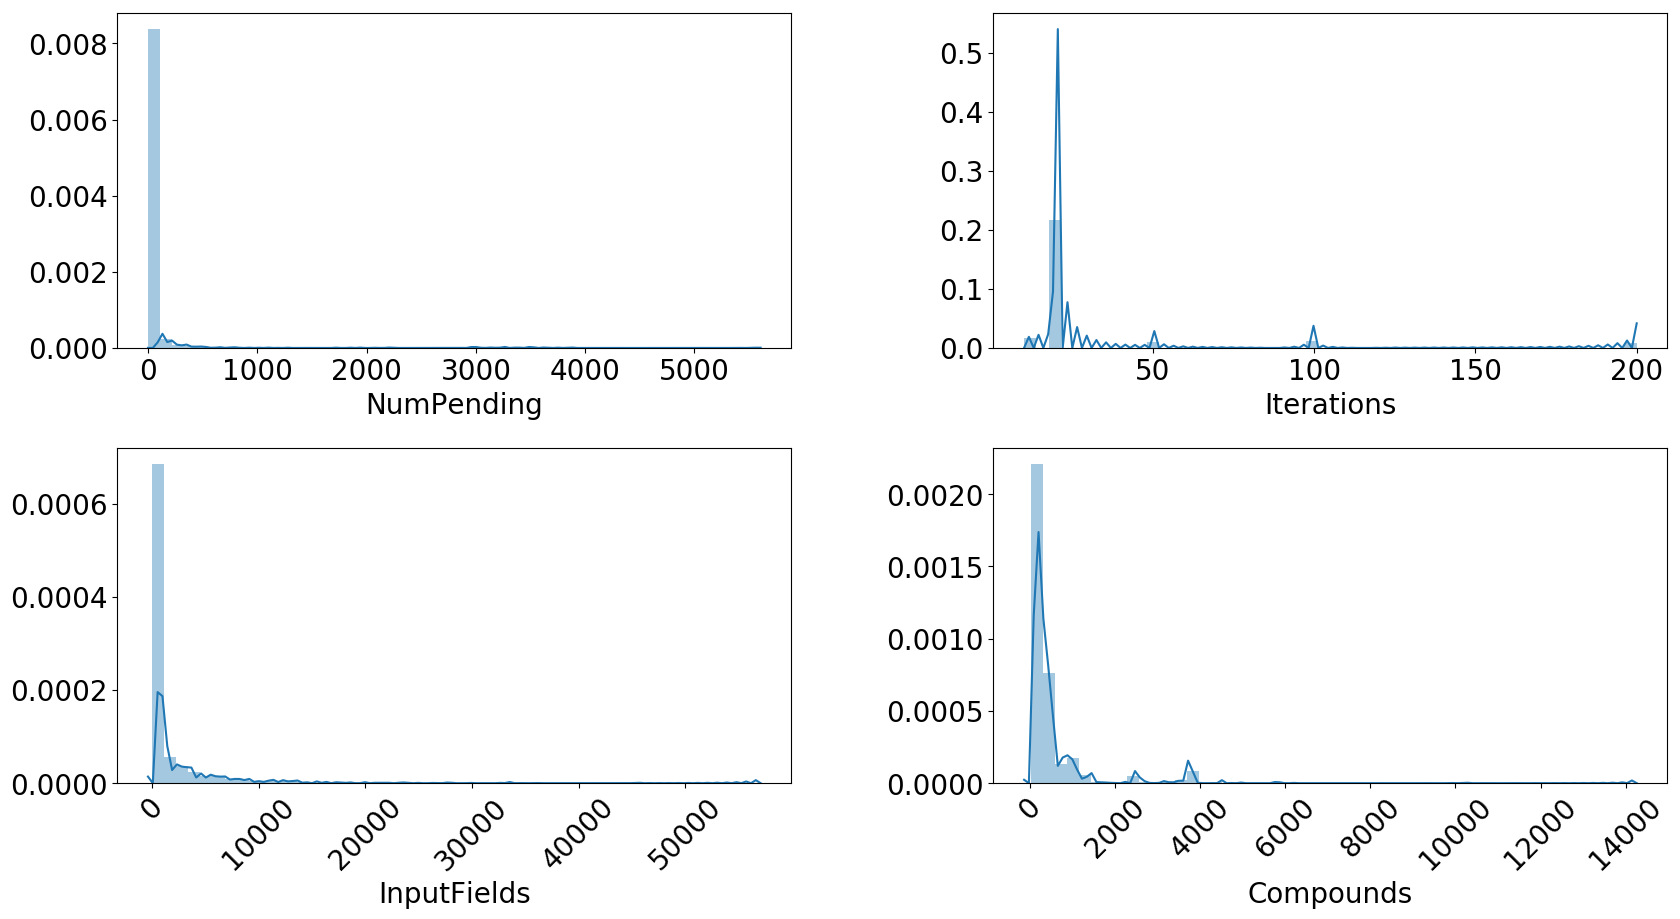

In [12]:
#연속형 변수 분포 확인
import seaborn as sns
mpl.rcParams.update({'font.size': 20})
plt.subplots(2,2,figsize=(20,10))

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
sns.distplot(df['NumPending'])

plt.subplot(2,2,2)
sns.distplot(df['Iterations'])

plt.subplot(2,2,3)
sns.distplot(df['InputFields'])
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.distplot(df['Compounds'])
plt.xticks(rotation = 45)
plt.show()

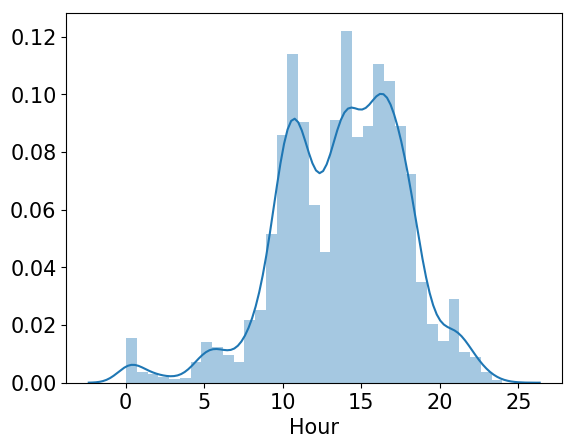

In [13]:
mpl.rcParams.update({'font.size': 15})
sns.distplot(df['Hour'])

In [14]:
#Skewness 구하기
import scipy.stats as st
print(st.skew(df['NumPending']))
print(st.skew(df['Iterations']))
print(st.skew(df['InputFields']))
print(st.skew(df['Compounds']))
print(st.skew(df['Hour']))

9.717963659787655
3.9368208049754556
5.8696061973443125
6.568231540247783
-0.545681985804814


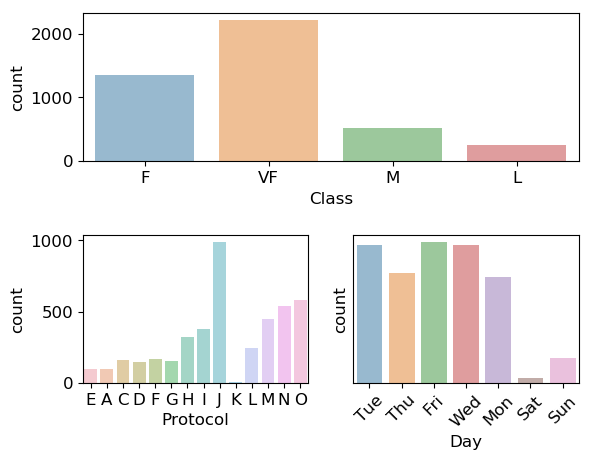

In [15]:
#범주형 변수 확인
import matplotlib.gridspec as gs
mpl.rcParams.update({'font.size': 12})
G = gs.GridSpec(2,2)
axes_1 = plt.subplot(G[0,:])
sns.countplot(x=df['Class'], data=df, alpha=0.5)

axes_2 = plt.subplot(G[1,0])
sns.countplot(x=df['Protocol'], data=df, alpha=0.5)

axes_3 = plt.subplot(G[1,1])
plt.yticks([])
plt.xticks(rotation = 45)
sns.countplot(x=df['Day'], data=df, alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

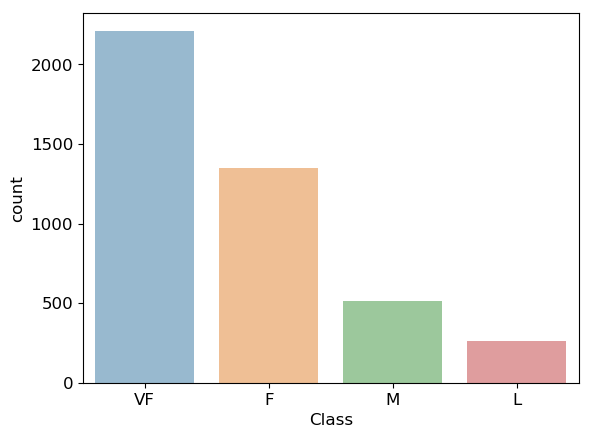

In [16]:
sns.countplot(x=df['Class'], data=df, alpha=0.5, order = df['Class'].value_counts().index)

In [17]:
#Protocol별 산점도를 위해 데이터 분리
df_a = df[df['Protocol'] == 'A']
df_b = df[df['Protocol'] == 'B']
df_c = df[df['Protocol'] == 'C']
df_d = df[df['Protocol'] == 'D']
df_e = df[df['Protocol'] == 'E']
df_f = df[df['Protocol'] == 'F']
df_g = df[df['Protocol'] == 'G']
df_h = df[df['Protocol'] == 'H']
df_i = df[df['Protocol'] == 'I']
df_j = df[df['Protocol'] == 'J']
df_k = df[df['Protocol'] == 'K']
df_l = df[df['Protocol'] == 'L']
df_m = df[df['Protocol'] == 'M']
df_n = df[df['Protocol'] == 'N']
df_o = df[df['Protocol'] == 'O']

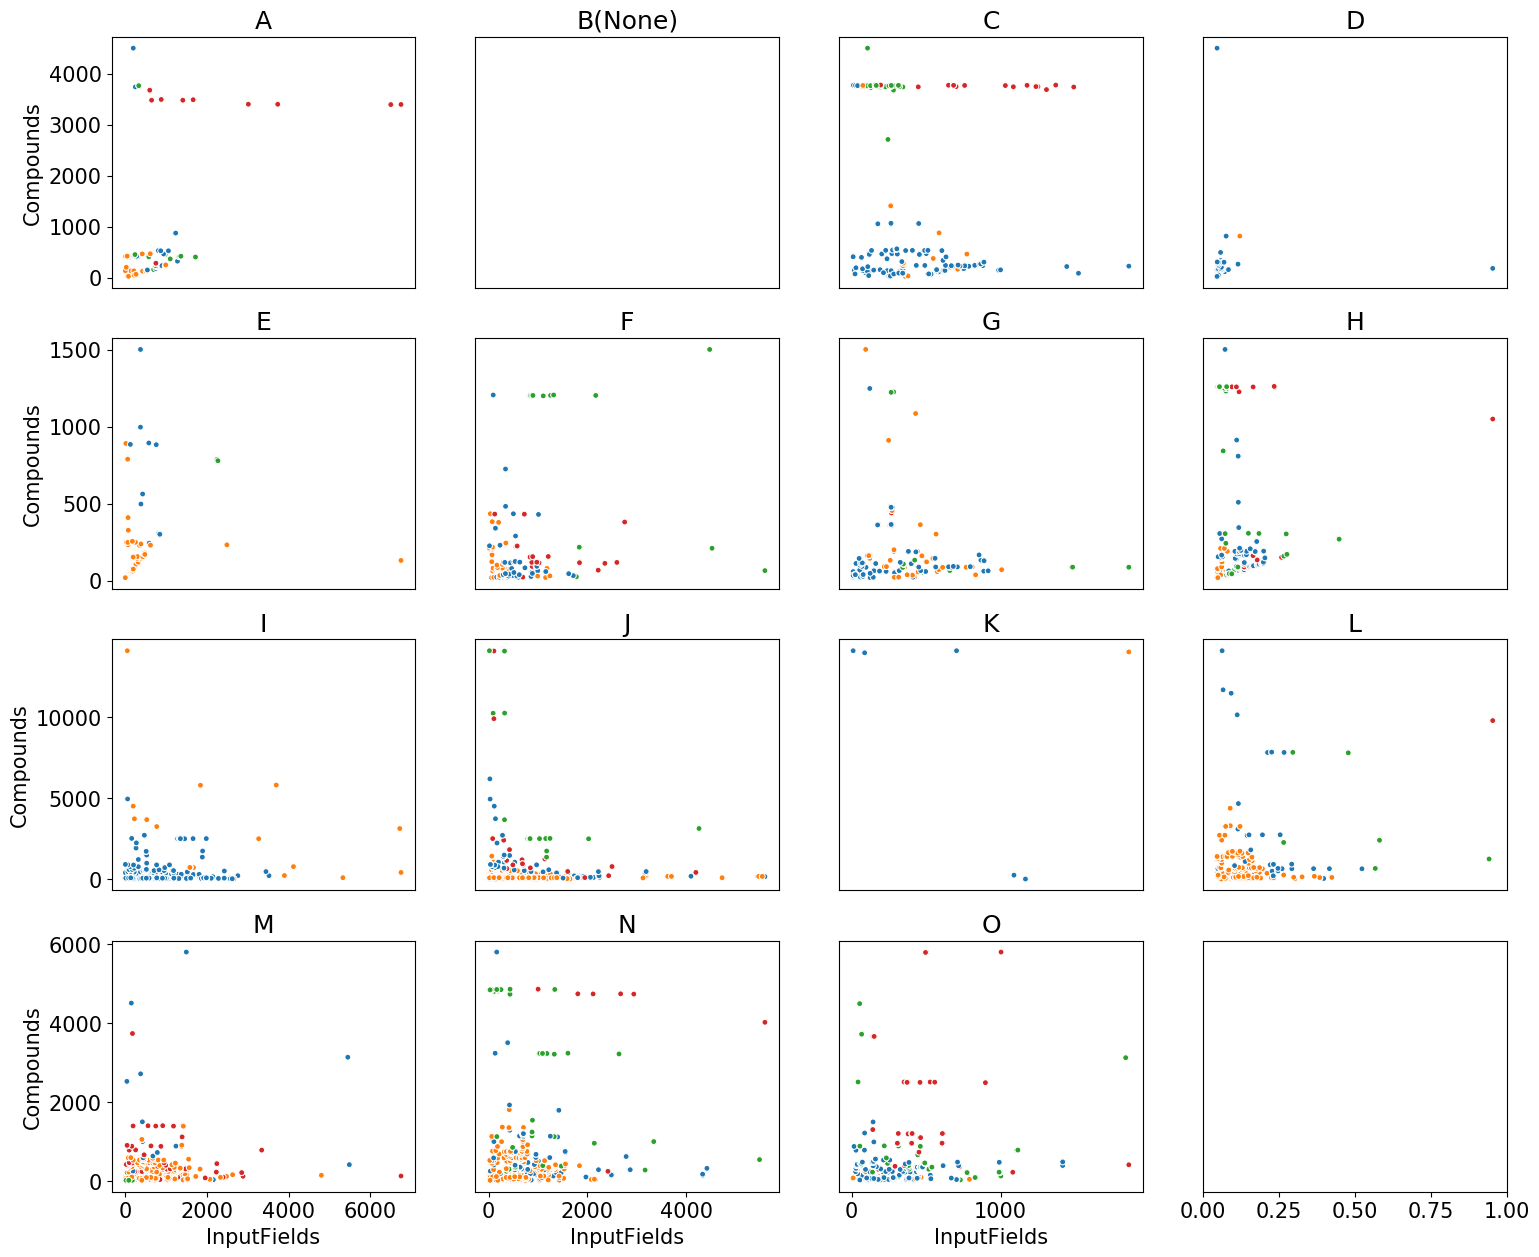

In [18]:
#제약회사의 Data로서 상관관계가 있을 것이라 판단되는 Compounds 및 InputFields의 Protocol별 산점도 확인
mpl.rcParams.update({'font.size': 15})
plt.subplots(4,4,figsize=(18,15))
plt.subplot(4,4,1)
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_a)
plt.title('A')
plt.subplot(4, 4, 2)
plt.yticks([])
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_b)
plt.title('B(None)')
plt.xticks([])
plt.subplot(4, 4, 3)
plt.yticks([])
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_c)
plt.title('C')
plt.xticks([])
plt.subplot(4, 4, 4)
plt.yticks([])
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_d)
plt.title('D')
plt.xticks([])
plt.subplot(4, 4, 5)
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_e)
plt.title('E')
plt.xticks([])
plt.subplot(4, 4, 6)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_f)
plt.title('F')
plt.xticks([])
plt.subplot(4, 4, 7)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_g)
plt.title('G')
plt.xticks([])
plt.subplot(4, 4, 8)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_h)
plt.title('H')
plt.xticks([])

plt.subplot(4, 4, 9)
plt.xticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_i)
plt.title('I')

plt.subplot(4, 4, 10)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_j)
plt.title('J')
plt.xticks([])
plt.subplot(4, 4, 11)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_k)
plt.title('K')
plt.xticks([])
plt.subplot(4, 4, 12)
plt.xticks([])
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_l)
plt.title('L')
plt.subplot(4, 4, 13)
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_m)
plt.title('M')

plt.subplot(4, 4, 14)
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_n)
plt.title('N')
plt.subplot(4, 4, 15)
plt.yticks([])
sns.scatterplot(y='Compounds', x='InputFields', hue='Class', size = 1, legend = False, data=df_o)
plt.title('O')
plt.subplot(4, 4, 16)
plt.yticks([])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

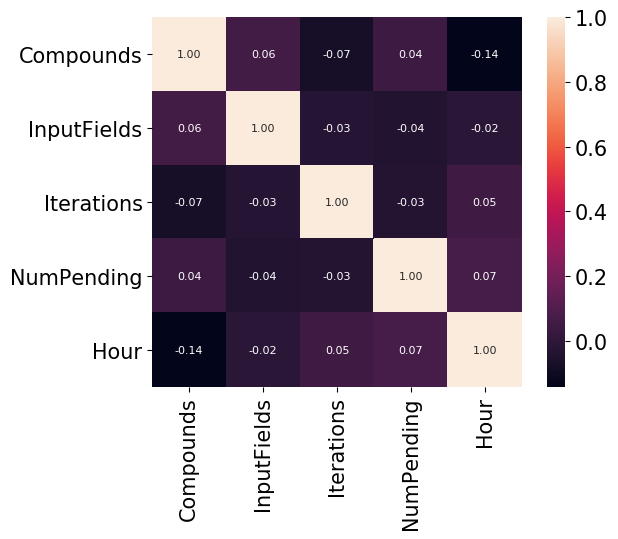

In [19]:
sns.heatmap(df.corr(),
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8})
plt.show()

# Data Preprocessing

In [20]:
#'Class' 변수 / Numeric Encoding(1,2,3,4)
mapping = {'VF': 1,
            'F': 2,
            'M': 3,
            'L': 4}
df['Class'] = df['Class'].map(mapping)
df.head()

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
0,E,997,137,20,0,14.000000,Tue,2
1,E,97,103,20,0,13.816667,Tue,1
2,E,101,75,10,0,13.850000,Thu,1
3,E,93,76,20,0,10.100000,Fri,1
4,E,100,82,20,0,10.366667,Fri,1


In [21]:
# Class 변수의 Data Type이 int64로 변경된 것을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 8 columns):
Protocol       4331 non-null object
Compounds      4331 non-null int64
InputFields    4331 non-null int64
Iterations     4331 non-null int64
NumPending     4331 non-null int64
Hour           4331 non-null float64
Day            4331 non-null object
Class          4331 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 270.8+ KB


In [22]:
# 'Protocol', 'Day' 변수 / One-Hot Encoding
df_r = pd.get_dummies(df[['Protocol', 'Compounds', 'InputFields','Iterations','NumPending','Hour','Day','Class']], drop_first=True)
df_r.columns

Index(['Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour', 'Class',
       'Protocol_C', 'Protocol_D', 'Protocol_E', 'Protocol_F', 'Protocol_G',
       'Protocol_H', 'Protocol_I', 'Protocol_J', 'Protocol_K', 'Protocol_L',
       'Protocol_M', 'Protocol_N', 'Protocol_O', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'Day_Tue', 'Day_Wed'],
      dtype='object')

In [23]:
#Protocol과 Day의 변수가 Unique Value에 따라 0 또는 1로 표현되어 있음을 확인
df_r.head()

,Compounds,InputFields,Iterations,NumPending,Hour,Class,Protocol_C,Protocol_D,Protocol_E,Protocol_F,...,Protocol_L,Protocol_M,Protocol_N,Protocol_O,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,997,137,20,0,14.000000,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,97,103,20,0,13.816667,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,101,75,10,0,13.850000,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,93,76,20,0,10.100000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100,82,20,0,10.366667,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# log 변환 / EDA 과정에서 확인한 오른쪽 꼬리가 긴 분포들에 대해 log변환
df_r['log_Compounds'] = np.log(df_r['Compounds'])
df_r['log_InputFields'] = np.log(df_r['InputFields'])
df_r['log_Iterations'] = np.log(df_r['Iterations'])
df_r['log_NumPending'] = np.log(df_r['NumPending']+1) #NumPending의 경우 0의 값을 많이 가지므로 1을 더하여 로그 변환

In [25]:
df_r.head()

,Compounds,InputFields,Iterations,NumPending,Hour,Class,Protocol_C,Protocol_D,Protocol_E,Protocol_F,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,log_Compounds,log_InputFields,log_Iterations,log_NumPending
0,997,137,20,0,14.000000,2,0,0,1,0,...,0,0,0,0,1,0,6.904751,4.919981,2.995732,0.0
1,97,103,20,0,13.816667,1,0,0,1,0,...,0,0,0,0,1,0,4.574711,4.634729,2.995732,0.0
2,101,75,10,0,13.850000,1,0,0,1,0,...,0,0,0,1,0,0,4.615121,4.317488,2.302585,0.0
3,93,76,20,0,10.100000,1,0,0,1,0,...,0,0,0,0,0,0,4.532599,4.330733,2.995732,0.0
4,100,82,20,0,10.366667,1,0,0,1,0,...,0,0,0,0,0,0,4.605170,4.406719,2.995732,0.0


In [26]:
#기존 숫자형 변수 삭제
df_r = df_r.drop(['Compounds'],axis=1) 
df_r = df_r.drop(['InputFields'], axis=1)
df_r = df_r.drop(['Iterations'], axis=1)
df_r = df_r.drop(['NumPending'], axis=1)
df_r.head()

,Hour,Class,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,Protocol_H,Protocol_I,Protocol_J,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,log_Compounds,log_InputFields,log_Iterations,log_NumPending
0,14.000000,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,6.904751,4.919981,2.995732,0.0
1,13.816667,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,4.574711,4.634729,2.995732,0.0
2,13.850000,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,4.615121,4.317488,2.302585,0.0
3,10.100000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,4.532599,4.330733,2.995732,0.0
4,10.366667,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,4.605170,4.406719,2.995732,0.0


# Data Split

In [27]:
# X / y Split을 위해 Hour 변수의 위치 변경
df_r['hour'] = df_r['Hour']
df_r = df_r.drop(['Hour'], axis=1)
df_r['Hour'] = df_r['hour']
df_r = df_r.drop(['hour'],axis=1)
df_r.head()

,Class,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,Protocol_H,Protocol_I,Protocol_J,Protocol_K,...,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,log_Compounds,log_InputFields,log_Iterations,log_NumPending,Hour
0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,6.904751,4.919981,2.995732,0.0,14.000000
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,4.574711,4.634729,2.995732,0.0,13.816667
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,4.615121,4.317488,2.302585,0.0,13.850000
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,4.532599,4.330733,2.995732,0.0,10.100000
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,4.605170,4.406719,2.995732,0.0,10.366667


In [28]:
# X / y Split
X = df_r.iloc[:,1:]
y = df_r.iloc[:,0:1]

In [29]:
X.head()

,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,Protocol_H,Protocol_I,Protocol_J,Protocol_K,Protocol_L,...,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,log_Compounds,log_InputFields,log_Iterations,log_NumPending,Hour
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,6.904751,4.919981,2.995732,0.0,14.000000
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,4.574711,4.634729,2.995732,0.0,13.816667
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,4.615121,4.317488,2.302585,0.0,13.850000
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.532599,4.330733,2.995732,0.0,10.100000
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,4.605170,4.406719,2.995732,0.0,10.366667


In [30]:
y.head()

,Class
0,2
1,1
2,1
3,1
4,1


In [31]:
# Train / Test Split
# 0.8   / 0.2로 구분하였으며, EDA 과정에서 y의 값들의 빈도가 확연히 차이나므로(1이 가장 많음) 층화 샘플링
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=1112, 
                     stratify=y)

In [32]:
#y가 고르게 분리되었는지 확인
print(y.mean())
print(y_train.mean())
print(y_test.mean())

Class    1.727776
dtype: float64
Class    1.727483
dtype: float64
Class    1.72895
dtype: float64


# Standardize

##### 머신러닝 알고리즘에서는 몇 가지(트리 기반 알고리즘)를 빼고는 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않음. (Hands-On Machine Learning p.107)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
X_train_std

array([[-0.19508495, -0.18279192, -0.14672278, ..., -0.21670481,
         2.42254364, -0.11429752],
       [-0.19508495, -0.18279192, -0.14672278, ..., -0.21670481,
        -0.45636983, -0.93403008],
       [-0.19508495, -0.18279192,  6.81557443, ..., -1.45851197,
        -0.45636983,  0.2135955 ],
       ...,
       [-0.19508495, -0.18279192, -0.14672278, ..., -0.21670481,
        -0.45636983, -0.74906479],
       [-0.19508495, -0.18279192, -0.14672278, ..., -0.21670481,
         2.2859567 , -1.08116157],
       [-0.19508495, -0.18279192, -0.14672278, ..., -0.21670481,
        -0.45636983,  2.17674989]])

# K-fold Learning

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
#Cost값을 반환하는 함수 정의
def cost_score(x, y):  
    model.fit(x, y) #지정한 x,y (X_train_std, y_train)으로 모델 적합
    y_pred = model.predict(x) #X_train_std를 통해 y의 예측값인 y_pred 계산
    Cfm_a = confusion_matrix(y, y_pred)  #실제 y값인 y_train과 예측값 y_pred로 confusion matrix 생성
    return np.multiply(Cfm_a, cost_matrix).sum() #사전에 정의한 cost matrix와 같은 위치의 값끼리 곱하여 모두 더함.
    
my_score = make_scorer(cost_score, greater_is_better=True) #위에서 정의한 Cost 값을 반환하는 함수를 score로 지정

In [130]:
#Score 함수 정의(accuracy, cost, kappa)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

cost_matrix = np.array([[0, 1, 5, 10], [1, 0, 5, 5], [1,1,0,1],[1,1,1,0]]) #cost_matrix를 정의한다.
Model = [] #빈 틀을 만들어준다.
Accuracy = []
Cost = []
cv = StratifiedKFold(5, random_state = 1112) #KFold 횟수 정의 

def make_score(name, model, x, y): #fold 별 정확도를 구하는 함수 정의 #x = X_train_std / y = y_train_ravled
    Model.append(name) #빈 틀 []에다가 우리가 정의한 list name을 넣어준다.
    Accuracy.append(cross_val_score(model, x, y, cv=cv, scoring='accuracy')) #각 폴드 별로 Accuracy 값을 구해준다.
    Cost.append(cross_val_score(model, x, y, cv=cv, scoring=my_score))


In [63]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [133]:
y_train_raveled = np.ravel(y_train)
y_train_raveled

array([3, 1, 1, ..., 1, 1, 1], dtype=int64)

# Default Model

In [135]:
##사용할 알고리즘의 이름 지정
names = ['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART', 'Random\nForest',
        'Bagging','AdaBoost','KNN']

##사용할 알고리즘의 모델을 정의
models = [Perceptron(),
         LogisticRegression(),
         LDA(),
         SVC(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         BaggingClassifier(),
         AdaBoostClassifier(),
         KNeighborsClassifier()
         ]

Model = [] #빈 틀을 만들어준다.
Accuracy = []
Cost = []

# 모델별 k-fold learning 실행
for name, model in zip(names, models):
    make_score(name, model, X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [115]:
print(Cost)

[array([511, 592, 280, 232, 255]), array([206, 222, 222, 225, 154]), array([218, 210, 220, 241, 235]), array([184, 187, 180, 227, 206]), array([319, 353, 282, 246, 282]), array([318, 329, 300, 325, 283]), array([273, 276, 305, 280, 271]), array([200, 218, 239, 185, 186]), array([217, 421, 199, 254, 223])]


Cost_norm2 = min_max_scaler.fit_transform(Cost_divide)
print(Cost_norm2)

min_max_scaler = MinMaxScaler(feature_range=(0,1)) #최소 최대 설정

Cost_norm = min_max_scaler.fit_transform(Cost)
print(Cost_norm)

In [116]:
print(Model)

['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART', 'Random\nForest', 'Bagging', 'AdaBoost', 'KNN']


In [117]:
print(Accuracy)

[array([0.63453237, 0.65706052, 0.6632948 , 0.63583815, 0.60057887]), array([0.72374101, 0.74351585, 0.7283237 , 0.72254335, 0.73516643]), array([0.72230216, 0.73198847, 0.71242775, 0.71531792, 0.71345876]), array([0.76258993, 0.78097983, 0.78034682, 0.74855491, 0.77134588]), array([0.75539568, 0.76080692, 0.78323699, 0.80346821, 0.78437048]), array([0.8       , 0.82276657, 0.8150289 , 0.81791908, 0.81620839]), array([0.7942446 , 0.80403458, 0.80780347, 0.82369942, 0.82054993]), array([0.6647482 , 0.70317003, 0.7066474 , 0.68930636, 0.6975398 ]), array([0.74100719, 0.76801153, 0.72976879, 0.71242775, 0.74384949])]


In [118]:
ev_default = pd.DataFrame({'Model' : Model,
                          'Accuracy' : Accuracy,
                          'Cost' : Cost})

ev_default

,Model,Accuracy,Cost
0,Perceptron,"[0.6345323741007194, 0.6570605187319885, 0.663...","[511, 592, 280, 232, 255]"
1,Logistic\nRegression,"[0.7237410071942446, 0.7435158501440923, 0.728...","[206, 222, 222, 225, 154]"
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]"
3,SVM,"[0.762589928057554, 0.7809798270893372, 0.7803...","[184, 187, 180, 227, 206]"
4,CART,"[0.7553956834532374, 0.760806916426513, 0.7832...","[319, 353, 282, 246, 282]"
5,Random\nForest,"[0.8, 0.8227665706051873, 0.815028901734104, 0...","[318, 329, 300, 325, 283]"
6,Bagging,"[0.7942446043165468, 0.8040345821325648, 0.807...","[273, 276, 305, 280, 271]"
7,AdaBoost,"[0.6647482014388489, 0.7031700288184438, 0.706...","[200, 218, 239, 185, 186]"
8,KNN,"[0.7410071942446043, 0.7680115273775217, 0.729...","[217, 421, 199, 254, 223]"


In [119]:
ev_default['New Score'] = np.divide(ev_default['Accuracy'], np.divide(ev_default['Cost'],1000))
ev_default

,Model,Accuracy,Cost,New Score
0,Perceptron,"[0.6345323741007194, 0.6570605187319885, 0.663...","[511, 592, 280, 232, 255]","[1.2417463289642259, 1.1098995248851158, 2.368..."
1,Logistic\nRegression,"[0.7237410071942446, 0.7435158501440923, 0.728...","[206, 222, 222, 225, 154]","[3.5133058601662364, 3.3491704961445596, 3.280..."
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]","[3.3133126526301893, 3.4856593934403732, 3.238..."
3,SVM,"[0.762589928057554, 0.7809798270893372, 0.7803...","[184, 187, 180, 227, 206]","[4.144510478573663, 4.176362711707686, 4.33526..."
4,CART,"[0.7553956834532374, 0.760806916426513, 0.7832...","[319, 353, 282, 246, 282]","[2.368011546875352, 2.155260386477374, 2.77743..."
5,Random\nForest,"[0.8, 0.8227665706051873, 0.815028901734104, 0...","[318, 329, 300, 325, 283]","[2.5157232704402515, 2.500810245000569, 2.7167..."
6,Bagging,"[0.7942446043165468, 0.8040345821325648, 0.807...","[273, 276, 305, 280, 271]","[2.9093208949324056, 2.913168775842626, 2.6485..."
7,AdaBoost,"[0.6647482014388489, 0.7031700288184438, 0.706...","[200, 218, 239, 185, 186]","[3.3237410071942444, 3.225550590910293, 2.9566..."
8,KNN,"[0.7410071942446043, 0.7680115273775217, 0.729...","[217, 421, 199, 254, 223]","[3.414779696979743, 1.824255409447795, 3.66717..."


In [197]:
print('<Mean & Standard Deviation of Accuracy>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_default['Model'][i],':',"%0.4f" %ev_default['Accuracy'][i].mean(),'/',"%0.4f" %ev_default['Accuracy'][i].std())

<Mean & Standard Deviation of Accuracy>
--------------------------------------------------
KNN : 0.7390 / 0.0182
--------------------------------------------------
AdaBoost : 0.6923 / 0.0150
--------------------------------------------------
Bagging : 0.8101 / 0.0108
--------------------------------------------------
Random
Forest : 0.8144 / 0.0077
--------------------------------------------------
CART : 0.7775 / 0.0174
--------------------------------------------------
SVM : 0.7688 / 0.0121
--------------------------------------------------
LDA : 0.7191 / 0.0073
--------------------------------------------------
Logistic
Regression : 0.7307 / 0.0078
--------------------------------------------------
Perceptron : 0.6383 / 0.0220


In [198]:
print('<Mean & Standard Deviation of Cost>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_default['Model'][i],':',"%0.1f" %ev_default['Cost'][i].mean(),'/',"%0.4f" %ev_default['Cost'][i].std())

<Mean & Standard Deviation of Cost>
--------------------------------------------------
KNN : 262.8 / 81.0639
--------------------------------------------------
AdaBoost : 205.6 / 20.5387
--------------------------------------------------
Bagging : 281.0 / 12.3774
--------------------------------------------------
Random
Forest : 311.0 / 17.1697
--------------------------------------------------
CART : 296.4 / 36.5218
--------------------------------------------------
SVM : 196.8 / 17.5431
--------------------------------------------------
LDA : 224.8 / 11.4438
--------------------------------------------------
Logistic
Regression : 205.8 / 26.7462
--------------------------------------------------
Perceptron : 374.0 / 147.9554


In [199]:
print('<Mean & Standard Deviation of New Score>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_default['Model'][i],':',"%0.4f" %ev_default['New Score'][i].mean(),'/',"%0.4f" %ev_default['New Score'][i].std())

<Mean & Standard Deviation of New Score>
--------------------------------------------------
KNN : 3.0093 / 0.6557
--------------------------------------------------
AdaBoost : 3.3964 / 0.3039
--------------------------------------------------
Bagging : 2.8881 / 0.1272
--------------------------------------------------
Random
Forest : 2.6268 / 0.1514
--------------------------------------------------
CART : 2.6697 / 0.3835
--------------------------------------------------
SVM : 3.9396 / 0.3755
--------------------------------------------------
LDA : 3.2083 / 0.1877
--------------------------------------------------
Logistic
Regression : 3.6257 / 0.5827
--------------------------------------------------
Perceptron : 1.9633 / 0.6590


In [120]:
ev_default_accuracy=[ev_default.loc[i,'Accuracy'] for i in range(0,9)] #Evaluation의 Accuracy 변수의 값으로 구성된 array를 0번 모델부터 번 모델까지 생성하여 a에 저장
ev_default_accuracy

[array([0.63453237, 0.65706052, 0.6632948 , 0.63583815, 0.60057887]),
 array([0.72374101, 0.74351585, 0.7283237 , 0.72254335, 0.73516643]),
 array([0.72230216, 0.73198847, 0.71242775, 0.71531792, 0.71345876]),
 array([0.76258993, 0.78097983, 0.78034682, 0.74855491, 0.77134588]),
 array([0.75539568, 0.76080692, 0.78323699, 0.80346821, 0.78437048]),
 array([0.8       , 0.82276657, 0.8150289 , 0.81791908, 0.81620839]),
 array([0.7942446 , 0.80403458, 0.80780347, 0.82369942, 0.82054993]),
 array([0.6647482 , 0.70317003, 0.7066474 , 0.68930636, 0.6975398 ]),
 array([0.74100719, 0.76801153, 0.72976879, 0.71242775, 0.74384949])]

In [121]:
ev_default_cost=[ev_default.loc[i,'Cost'] for i in range(0,9)] #Evaluation의 Cost 변수의 값으로 구성된 array를 0번 모델부터 번 모델까지 생성하여 a에 저장
ev_default_cost

[array([511, 592, 280, 232, 255]),
 array([206, 222, 222, 225, 154]),
 array([218, 210, 220, 241, 235]),
 array([184, 187, 180, 227, 206]),
 array([319, 353, 282, 246, 282]),
 array([318, 329, 300, 325, 283]),
 array([273, 276, 305, 280, 271]),
 array([200, 218, 239, 185, 186]),
 array([217, 421, 199, 254, 223])]

In [122]:
ev_default_new=[ev_default.loc[i,'New Score'] for i in range(0,9)]
ev_default_new

[array([1.24174633, 1.10989952, 2.36890999, 2.74068168, 2.35521126]),
 array([3.51330586, 3.3491705 , 3.28073738, 3.21130379, 4.77380796]),
 array([3.31331265, 3.48565939, 3.23830793, 2.96812415, 3.0359947 ]),
 array([4.14451048, 4.17636271, 4.33526012, 3.29759874, 3.74439745]),
 array([2.36801155, 2.15526039, 2.77743615, 3.26613093, 2.78145559]),
 array([2.51572327, 2.50081025, 2.71676301, 2.51667408, 2.8841286 ]),
 array([2.90932089, 2.91316878, 2.64853596, 2.94178365, 3.02785951]),
 array([3.32374101, 3.22555059, 2.95668368, 3.72598032, 3.75021396]),
 array([3.4147797 , 1.82425541, 3.66717983, 2.80483364, 3.33564795])]

In [123]:
from pandas import DataFrame
ev_default_accuracy_fold = DataFrame(ev_default_accuracy, columns=['Fold_'+str(i) for i in range(1,6)]) #array로 구성된 a의 값을 'Fold_(1~5까지)'라는 Column명으로 DataFrame화 시켜준다.
ev_default_accuracy_fold

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
0,0.634532,0.657061,0.663295,0.635838,0.600579
1,0.723741,0.743516,0.728324,0.722543,0.735166
2,0.722302,0.731988,0.712428,0.715318,0.713459
3,0.762590,0.780980,0.780347,0.748555,0.771346
4,0.755396,0.760807,0.783237,0.803468,0.784370
5,0.800000,0.822767,0.815029,0.817919,0.816208
6,0.794245,0.804035,0.807803,0.823699,0.820550
7,0.664748,0.703170,0.706647,0.689306,0.697540
8,0.741007,0.768012,0.729769,0.712428,0.743849


In [124]:
ev_default_cost_fold = DataFrame(ev_default_cost, columns=['Fold_'+str(i) for i in range(1,6)]) #array로 구성된 a의 값을 'Fold_(1~10까지)'라는 Column명으로 DataFrame화 시켜준다.
ev_default_cost_fold

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
0,511,592,280,232,255
1,206,222,222,225,154
2,218,210,220,241,235
3,184,187,180,227,206
4,319,353,282,246,282
5,318,329,300,325,283
6,273,276,305,280,271
7,200,218,239,185,186
8,217,421,199,254,223


In [125]:
ev_default_new_fold = DataFrame(ev_default_new, columns=['Fold_'+str(i) for i in range(1,6)]) #array로 구성된 a의 값을 'Fold_(1~10까지)'라는 Column명으로 DataFrame화 시켜준다.
ev_default_new_fold

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
0,1.241746,1.109900,2.368910,2.740682,2.355211
1,3.513306,3.349170,3.280737,3.211304,4.773808
2,3.313313,3.485659,3.238308,2.968124,3.035995
3,4.144510,4.176363,4.335260,3.297599,3.744397
4,2.368012,2.155260,2.777436,3.266131,2.781456
5,2.515723,2.500810,2.716763,2.516674,2.884129
6,2.909321,2.913169,2.648536,2.941784,3.027860
7,3.323741,3.225551,2.956684,3.725980,3.750214
8,3.414780,1.824255,3.667180,2.804834,3.335648


In [126]:
ev_default_model = ev_default['Model'].ravel()
ev_default_model

array(['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART',
       'Random\nForest', 'Bagging', 'AdaBoost', 'KNN'], dtype=object)

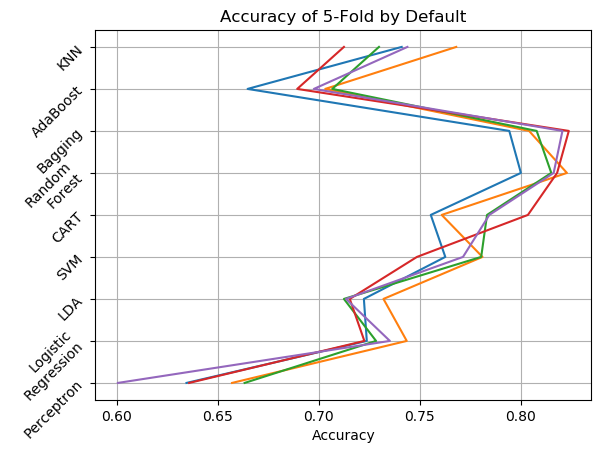

In [127]:
mpl.rcdefaults()
for i in range(1,6):
    plt.plot(ev_default_accuracy_fold['Fold_'+str(i)], ev_default_model)
plt.xlabel('Accuracy')
plt.grid()
plt.yticks(rotation=45)
plt.title('Accuracy of 5-Fold by Default')
plt.show()

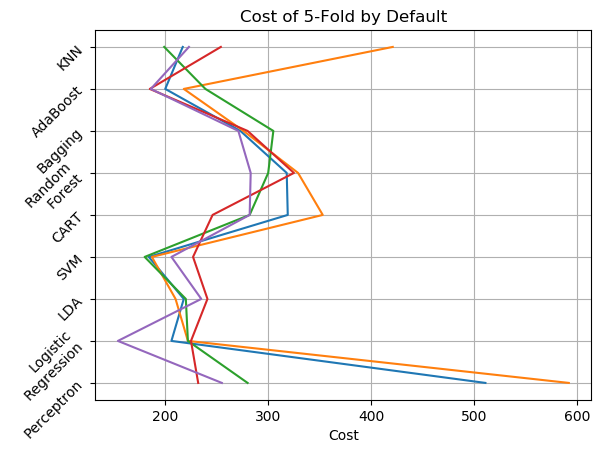

In [128]:
for i in range(1,6):
    plt.plot(ev_default_cost_fold['Fold_'+str(i)], ev_default_model)
plt.xlabel('Cost')
plt.grid()
plt.yticks(rotation=45)
plt.title('Cost of 5-Fold by Default')
plt.show()

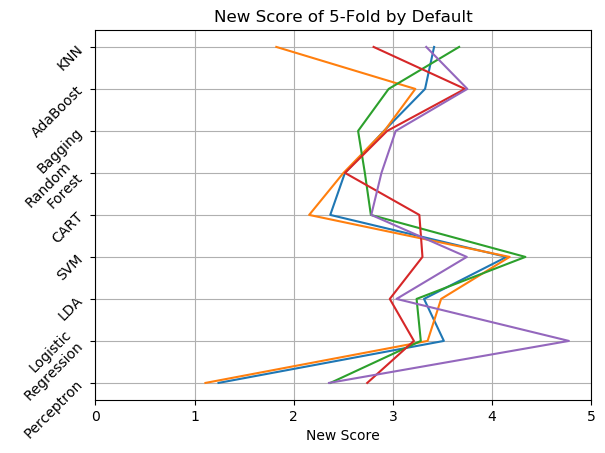

In [149]:
for i in range(1,6):
    plt.plot(ev_default_new_fold['Fold_'+str(i)], ev_default_model)
plt.xlabel('New Score')
plt.grid()
plt.yticks(rotation=45)
plt.xlim(0,5)
plt.title('New Score of 5-Fold by Default')
plt.show()

# Do It Ourselves

In [136]:
##사용할 알고리즘의 이름 지정
names = ['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART', 'Random\nForest',
        'Bagging','AdaBoost','KNN']

##사용할 알고리즘의 모델을 정의
models = [Perceptron(n_iter=100, eta0=0.1, random_state=1),
         LogisticRegression(C=100.0),
         LDA(),
         SVC(gamma='auto', decision_function_shape='ovo'),
         DecisionTreeClassifier(max_depth=14),
         RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2),
         BaggingClassifier(n_estimators = 50),
         AdaBoostClassifier(n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1),
         KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
         ]

Model = [] #빈 틀을 만들어준다.
Accuracy = []
Cost = []

# 모델별 k-fold learning 실행
for name, model in zip(names, models):
    make_score(name, model, X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Pro

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [137]:
ev_ourselves = pd.DataFrame({'Model' : Model,
                          'Accuracy' : Accuracy,
                          'Cost' : Cost})

ev_ourselves

,Model,Accuracy,Cost
0,Perceptron,"[0.6474820143884892, 0.6282420749279539, 0.606...","[329, 1389, 497, 590, 448]"
1,Logistic\nRegression,"[0.7266187050359713, 0.7463976945244957, 0.731...","[208, 220, 222, 228, 155]"
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]"
3,SVM,"[0.762589928057554, 0.7809798270893372, 0.7803...","[184, 187, 180, 227, 206]"
4,CART,"[0.7525179856115108, 0.7622478386167147, 0.781...","[346, 358, 315, 262, 290]"
5,Random\nForest,"[0.8057553956834532, 0.8371757925072046, 0.823...","[292, 265, 271, 262, 268]"
6,Bagging,"[0.8057553956834532, 0.8227665706051873, 0.817...","[276, 280, 277, 238, 232]"
7,AdaBoost,"[0.6647482014388489, 0.6988472622478387, 0.699...","[181, 184, 179, 185, 172]"
8,KNN,"[0.7410071942446043, 0.7680115273775217, 0.729...","[217, 421, 199, 254, 223]"


In [138]:
ev_ourselves['New Score'] = np.divide(ev_ourselves['Accuracy'], np.divide(ev_ourselves['Cost'],1000))
ev_ourselves

,Model,Accuracy,Cost,New Score
0,Perceptron,"[0.6474820143884892, 0.6282420749279539, 0.606...","[329, 1389, 497, 590, 448]","[1.9680304388707877, 0.45229811009931886, 1.22..."
1,Logistic\nRegression,"[0.7266187050359713, 0.7463976945244957, 0.731...","[208, 220, 222, 228, 155]","[3.493359158826785, 3.3927167932931623, 3.2937..."
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]","[3.3133126526301893, 3.4856593934403732, 3.238..."
3,SVM,"[0.762589928057554, 0.7809798270893372, 0.7803...","[184, 187, 180, 227, 206]","[4.144510478573663, 4.176362711707686, 4.33526..."
4,CART,"[0.7525179856115108, 0.7622478386167147, 0.781...","[346, 358, 315, 262, 290]","[2.1749074728656383, 2.1291839067505998, 2.481..."
5,Random\nForest,"[0.8057553956834532, 0.8371757925072046, 0.823...","[292, 265, 271, 262, 268]","[2.7594362865871687, 3.1591539339894514, 3.039..."
6,Bagging,"[0.8057553956834532, 0.8227665706051873, 0.817...","[276, 280, 277, 238, 232]","[2.9194036075487433, 2.9384520378756687, 2.952..."
7,AdaBoost,"[0.6647482014388489, 0.6988472622478387, 0.699...","[181, 184, 179, 185, 172]","[3.672641996899718, 3.798082946999123, 3.90738..."
8,KNN,"[0.7410071942446043, 0.7680115273775217, 0.729...","[217, 421, 199, 254, 223]","[3.414779696979743, 1.824255409447795, 3.66717..."


In [200]:
print('<Mean & Standard Deviation of Accuracy>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_ourselves['Model'][i],':',"%0.4f" %ev_ourselves['Accuracy'][i].mean(),'/',"%0.4f" %ev_ourselves['Accuracy'][i].std())

<Mean & Standard Deviation of Accuracy>
--------------------------------------------------
KNN : 0.7390 / 0.0182
--------------------------------------------------
AdaBoost : 0.6877 / 0.0126
--------------------------------------------------
Bagging : 0.8222 / 0.0109
--------------------------------------------------
Random
Forest : 0.8199 / 0.0104
--------------------------------------------------
CART : 0.7757 / 0.0157
--------------------------------------------------
SVM : 0.7688 / 0.0121
--------------------------------------------------
LDA : 0.7191 / 0.0073
--------------------------------------------------
Logistic
Regression : 0.7335 / 0.0078
--------------------------------------------------
Perceptron : 0.6241 / 0.0225


In [201]:
print('<Mean & Standard Deviation of Cost>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_ourselves['Model'][i],':',"%0.1f" %ev_ourselves['Cost'][i].mean(),'/',"%0.4f" %ev_ourselves['Cost'][i].std())

<Mean & Standard Deviation of Cost>
--------------------------------------------------
KNN : 262.8 / 81.0639
--------------------------------------------------
AdaBoost : 180.2 / 4.6217
--------------------------------------------------
Bagging : 260.6 / 21.0295
--------------------------------------------------
Random
Forest : 271.6 / 10.6320
--------------------------------------------------
CART : 314.2 / 35.3293
--------------------------------------------------
SVM : 196.8 / 17.5431
--------------------------------------------------
LDA : 224.8 / 11.4438
--------------------------------------------------
Logistic
Regression : 206.6 / 26.6053
--------------------------------------------------
Perceptron : 650.6 / 378.6748


In [203]:
print('<Mean & Standard Deviation of New Score>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_ourselves['Model'][i],':',"%0.4f" %ev_ourselves['New Score'][i].mean(),'/',"%0.4f" %ev_ourselves['New Score'][i].std())

<Mean & Standard Deviation of New Score>
--------------------------------------------------
KNN : 3.0093 / 0.6557
--------------------------------------------------
AdaBoost : 3.8187 / 0.1233
--------------------------------------------------
Bagging : 3.1788 / 0.2966
--------------------------------------------------
Random
Forest : 3.0240 / 0.1402
--------------------------------------------------
CART : 2.5065 / 0.3357
--------------------------------------------------
SVM : 3.9396 / 0.3755
--------------------------------------------------
LDA : 3.2083 / 0.1877
--------------------------------------------------
Logistic
Regression : 3.6246 / 0.5778
--------------------------------------------------
Perceptron : 1.2114 / 0.4844


In [168]:
ev_ourselves_accuracy=[ev_ourselves.loc[i,'Accuracy'] for i in range(0,9)] #Evaluation의 Accuracy 변수의 값으로 구성된 array를 0번 모델부터 번 모델까지 생성하여 a에 저장
ev_ourselves_cost=[ev_ourselves.loc[i,'Cost'] for i in range(0,9)]
ev_ourselves_new=[ev_ourselves.loc[i,'New Score'] for i in range(0,9)]

In [142]:
ev_ourselves_accuracy_fold = DataFrame(ev_ourselves_accuracy, columns=['Fold_'+str(i) for i in range(1,6)])
ev_ourselves_cost_fold = DataFrame(ev_ourselves_cost, columns=['Fold_'+str(i) for i in range(1,6)])
ev_ourselves_new_fold = DataFrame(ev_ourselves_new, columns=['Fold_'+str(i) for i in range(1,6)])

In [145]:
ev_ourselves_model = ev_ourselves['Model'].ravel()
ev_ourselves_model

array(['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART',
       'Random\nForest', 'Bagging', 'AdaBoost', 'KNN'], dtype=object)

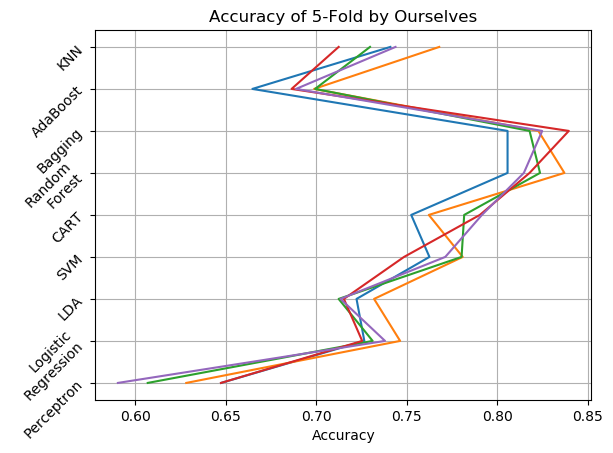

In [146]:
mpl.rcdefaults()
for i in range(1,6):
    plt.plot(ev_ourselves_accuracy_fold['Fold_'+str(i)], ev_ourselves_model)
plt.xlabel('Accuracy')
plt.grid()
plt.yticks(rotation=45)
plt.title('Accuracy of 5-Fold by Ourselves')
plt.show()

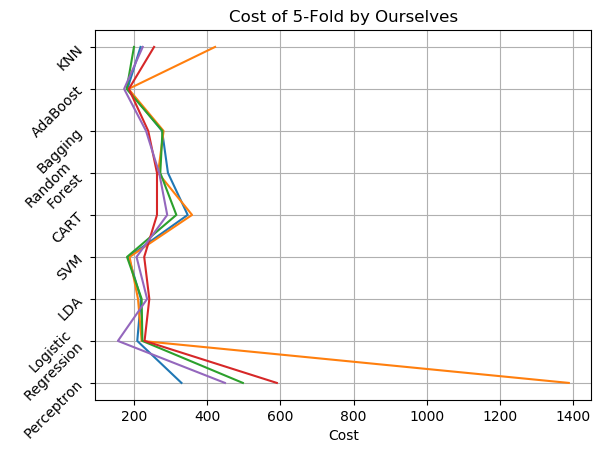

In [147]:
for i in range(1,6):
    plt.plot(ev_ourselves_cost_fold['Fold_'+str(i)], ev_ourselves_model)
plt.xlabel('Cost')
plt.grid()
plt.yticks(rotation=45)
plt.title('Cost of 5-Fold by Ourselves')
plt.show()

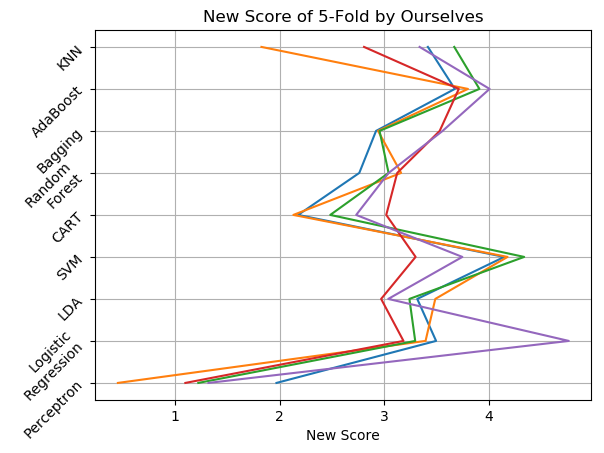

In [148]:
for i in range(1,6):
    plt.plot(ev_ourselves_new_fold['Fold_'+str(i)], ev_ourselves_model)
plt.xlabel('New Score')
plt.grid()
plt.yticks(rotation=45)
plt.title('New Score of 5-Fold by Ourselves')
plt.show()

# by GridSearchCV

## Perceptron

In [228]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [231]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
etas = np.logspace(-15, 0, 15)
param_grid = [{'alpha': param_range,
              'eta0': etas}]
ppn = Perceptron(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = ppn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.6215357967667436
{'alpha': 0.0001, 'eta0': 1e-15}


## Logistic Regression

In [232]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [245]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
              'penalty':['l1','l2'],
              'class_weight':['balanced','']}]
lg = LogisticRegression(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = lg, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.7338337182448037
{'C': 10.0, 'class_weight': '', 'penalty': 'l1'}


In [246]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

LogisticRegression(C=10.0, class_weight='', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1112, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## LDA

In [247]:
LDA()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [256]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'n_components': [1,2,3],
              'solver':['svd','lsqr','eigen'],
              'tol':[0.0001,0.001,0.01,1.0]},
             {'solver':['svd','lsqr','eigen']}]
lda = LDA()
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = lda, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

0.7191108545034642
{'n_components': 1, 'solver': 'svd', 'tol': 0.0001}


In [257]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## SVC

In [223]:
from sklearn.svm import SVC

svc = SVC(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'C': param_range, 
               'kernel': ['linear']},
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv,
                  n_jobs=-1)
gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.8045612009237876
{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [224]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1112, shrinking=True,
  tol=0.001, verbose=False)

## CART(Decision Tree)

In [258]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [259]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
depths = np.arange(3,20,1)
param_grid = [{'max_depth': depths,
              'criterion':['gini','entropy'],
              'splitter':['best','random']}]
cart = DecisionTreeClassifier(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = cart, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.7846420323325635
{'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}


In [260]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1112,
            splitter='best')

## Random Forest

In [261]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [270]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
depths = np.arange(3,30,1)
depths2 = np.arange(2,30,1)
param_grid = [{'max_depth': depths,
              'criterion':['gini','entropy'],
              'n_estimators':depths2},
             {'criterion':['gini','entropy'],
              'n_estimators':depths2}]
rf = RandomForestClassifier(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.8262124711316398
{'criterion': 'entropy', 'max_depth': 23, 'n_estimators': 26}


In [271]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=23, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=None,
            oob_score=False, random_state=1112, verbose=0,
            warm_start=False)

##  Bagging

In [272]:
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [274]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
depths2 = np.arange(1,100,3)
param_grid = [{'n_estimators':depths2}]
bg = BaggingClassifier(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = bg, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.8239030023094688
{'n_estimators': 82}


In [275]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=82, n_jobs=None, oob_score=False, random_state=1112,
         verbose=0, warm_start=False)

## Ada Boost

In [276]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [282]:
param_range = np.arange(1,1000,20)
param_grid = [{'algorithm':['SAMME.R','SAMME'],
              'n_estimators':param_range}]
ada = AdaBoostClassifier(random_state=1112)
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = ada, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.7165127020785219
{'algorithm': 'SAMME', 'n_estimators': 921}


In [283]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=921, random_state=1112)

## KNN

In [284]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [286]:
param_range = np.arange(1,50,2)
param_grid = [{'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors':param_range,
             'p':[1,2]}]
knn = KNeighborsClassifier()
cv = StratifiedKFold(5, random_state=1112)
gs = GridSearchCV(estimator = knn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=cv)

gs = gs.fit(X_train_std, y_train_raveled)

print(gs.best_score_)
print(gs.best_params_)

0.7846420323325635
{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}


In [287]:
clf = gs.best_estimator_
clf.fit(X_train, y_train_raveled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform')

# by GridSearchCV

In [290]:
##사용할 알고리즘의 이름 지정
names = ['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART', 'Random\nForest',
        'Bagging','AdaBoost','KNN']

##사용할 알고리즘의 모델을 정의
models = [Perceptron(alpha=0.0001, eta0=1e-15),
          LogisticRegression(C=10.0, class_weight='', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1112, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          LDA(n_components=1, priors=None, shrinkage=None,
          solver='svd', store_covariance=False, tol=0.0001),
          SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
          max_iter=-1, probability=False, random_state=1112, shrinking=True,
          tol=0.001, verbose=False),
          DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
          max_features=None, max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, presort=False, random_state=1112,
          splitter='best'),
          RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
          max_depth=23, max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=None,
          oob_score=False, random_state=1112, verbose=0,
          warm_start=False),
          BaggingClassifier(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=82, n_jobs=None, oob_score=False, random_state=1112,
          verbose=0, warm_start=False),
          AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=921, random_state=1112),
          KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=1,
          weights='uniform')
         ]

Model = [] #빈 틀을 만들어준다.
Accuracy = []
Cost = []

# 모델별 k-fold learning 실행
for name, model in zip(names, models):
    make_score(name, model, X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [291]:
ev_grid = pd.DataFrame({'Model' : Model,
                          'Accuracy' : Accuracy,
                          'Cost' : Cost})

ev_grid

,Model,Accuracy,Cost
0,Perceptron,"[0.6345323741007194, 0.6570605187319885, 0.663...","[511, 592, 280, 232, 255]"
1,Logistic\nRegression,"[0.7280575539568346, 0.7449567723342939, 0.731...","[207, 219, 223, 227, 155]"
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]"
3,SVM,"[0.7841726618705036, 0.8314121037463977, 0.806...","[167, 270, 292, 314, 302]"
4,CART,"[0.7640287769784173, 0.7824207492795389, 0.778...","[336, 354, 332, 272, 282]"
5,Random\nForest,"[0.8043165467625899, 0.8429394812680115, 0.815...","[321, 245, 289, 244, 265]"
6,Bagging,"[0.814388489208633, 0.829971181556196, 0.80491...","[261, 274, 296, 237, 223]"
7,AdaBoost,"[0.7035971223021583, 0.7363112391930836, 0.709...","[203, 205, 230, 214, 237]"
8,KNN,"[0.7697841726618705, 0.7896253602305475, 0.783...","[288, 293, 421, 301, 283]"


In [292]:
ev_grid['New Score'] = np.divide(ev_grid['Accuracy'], np.divide(ev_grid['Cost'],1000))
ev_grid

,Model,Accuracy,Cost,New Score
0,Perceptron,"[0.6345323741007194, 0.6570605187319885, 0.663...","[511, 592, 280, 232, 255]","[1.2417463289642259, 1.1098995248851158, 2.368..."
1,Logistic\nRegression,"[0.7280575539568346, 0.7449567723342939, 0.731...","[207, 219, 223, 227, 155]","[3.517186250999201, 3.4016290974168673, 3.2789..."
2,LDA,"[0.7223021582733813, 0.7319884726224783, 0.712...","[218, 210, 220, 241, 235]","[3.3133126526301893, 3.4856593934403732, 3.238..."
3,SVM,"[0.7841726618705036, 0.8314121037463977, 0.806...","[167, 270, 292, 314, 302]","[4.695644681859303, 3.079304087949621, 2.76150..."
4,CART,"[0.7640287769784173, 0.7824207492795389, 0.778...","[336, 354, 332, 272, 282]","[2.2738951695786227, 2.210228105309432, 2.3460..."
5,Random\nForest,"[0.8043165467625899, 0.8429394812680115, 0.815...","[321, 245, 289, 244, 265]","[2.505659024182523, 3.4405693112980065, 2.8201..."
6,Bagging,"[0.814388489208633, 0.829971181556196, 0.80491...","[261, 274, 296, 237, 223]","[3.120262410761046, 3.0290919034897663, 2.7193..."
7,AdaBoost,"[0.7035971223021583, 0.7363112391930836, 0.709...","[203, 205, 230, 214, 237]","[3.4659956763653117, 3.591762142405286, 3.0849..."
8,KNN,"[0.7697841726618705, 0.7896253602305475, 0.783...","[288, 293, 421, 301, 283]","[2.672861710631495, 2.694967099762961, 1.86042..."


In [293]:
print('<Mean & Standard Deviation of Accuracy>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_grid['Model'][i],':',"%0.4f" %ev_grid['Accuracy'][i].mean(),'/',"%0.4f" %ev_grid['Accuracy'][i].std())

<Mean & Standard Deviation of Accuracy>
--------------------------------------------------
KNN : 0.7847 / 0.0079
--------------------------------------------------
AdaBoost : 0.7165 / 0.0133
--------------------------------------------------
Bagging : 0.8239 / 0.0130
--------------------------------------------------
Random
Forest : 0.8262 / 0.0172
--------------------------------------------------
CART : 0.7847 / 0.0140
--------------------------------------------------
SVM : 0.8046 / 0.0157
--------------------------------------------------
LDA : 0.7191 / 0.0073
--------------------------------------------------
Logistic
Regression : 0.7338 / 0.0068
--------------------------------------------------
Perceptron : 0.6383 / 0.0220


In [294]:
print('<Mean & Standard Deviation of Cost>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_grid['Model'][i],':',"%0.4f" %ev_grid['Cost'][i].mean(),'/',"%0.4f" %ev_grid['Cost'][i].std())

<Mean & Standard Deviation of Cost>
--------------------------------------------------
KNN : 317.2000 / 52.2394
--------------------------------------------------
AdaBoost : 217.8000 / 13.5263
--------------------------------------------------
Bagging : 258.2000 / 25.9800
--------------------------------------------------
Random
Forest : 272.8000 / 29.1506
--------------------------------------------------
CART : 315.2000 / 32.2143
--------------------------------------------------
SVM : 269.0000 / 53.0057
--------------------------------------------------
LDA : 224.8000 / 11.4438
--------------------------------------------------
Logistic
Regression : 206.2000 / 26.4605
--------------------------------------------------
Perceptron : 374.0000 / 147.9554


In [295]:
print('<Mean & Standard Deviation of New Score>')
for i in [8,7,6,5,4,3,2,1,0]:
    print('-'*50)
    print(ev_grid['Model'][i],':',"%0.4f" %ev_grid['New Score'][i].mean(),'/',"%0.4f" %ev_grid['New Score'][i].std())

<Mean & Standard Deviation of New Score>
--------------------------------------------------
KNN : 2.5294 / 0.3393
--------------------------------------------------
AdaBoost : 3.3040 / 0.2349
--------------------------------------------------
Bagging : 3.2271 / 0.3608
--------------------------------------------------
Random
Forest : 3.0680 / 0.3711
--------------------------------------------------
CART : 2.5200 / 0.3015
--------------------------------------------------
SVM : 3.1474 / 0.7949
--------------------------------------------------
LDA : 3.2083 / 0.1877
--------------------------------------------------
Logistic
Regression : 3.6323 / 0.5748
--------------------------------------------------
Perceptron : 1.9633 / 0.6590


In [296]:
ev_grid_accuracy=[ev_grid.loc[i,'Accuracy'] for i in range(0,9)] #Evaluation의 Accuracy 변수의 값으로 구성된 array를 0번 모델부터 번 모델까지 생성하여 a에 저장
ev_grid_cost=[ev_grid.loc[i,'Cost'] for i in range(0,9)]
ev_grid_new=[ev_grid.loc[i,'New Score'] for i in range(0,9)]

In [297]:
ev_grid_accuracy_fold = DataFrame(ev_grid_accuracy, columns=['Fold_'+str(i) for i in range(1,6)])
ev_grid_cost_fold = DataFrame(ev_grid_cost, columns=['Fold_'+str(i) for i in range(1,6)])
ev_grid_new_fold = DataFrame(ev_grid_new, columns=['Fold_'+str(i) for i in range(1,6)])

In [298]:
ev_grid_model = ev_grid['Model'].ravel()
ev_grid_model

array(['Perceptron', 'Logistic\nRegression', 'LDA', 'SVM', 'CART',
       'Random\nForest', 'Bagging', 'AdaBoost', 'KNN'], dtype=object)

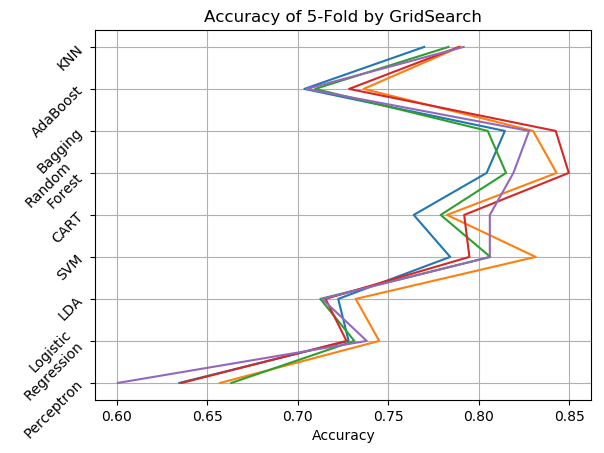

In [299]:
mpl.rcdefaults()
for i in range(1,6):
    plt.plot(ev_grid_accuracy_fold['Fold_'+str(i)], ev_grid_model)
plt.xlabel('Accuracy')
plt.grid()
plt.yticks(rotation=45)
plt.title('Accuracy of 5-Fold by GridSearch')
plt.show()

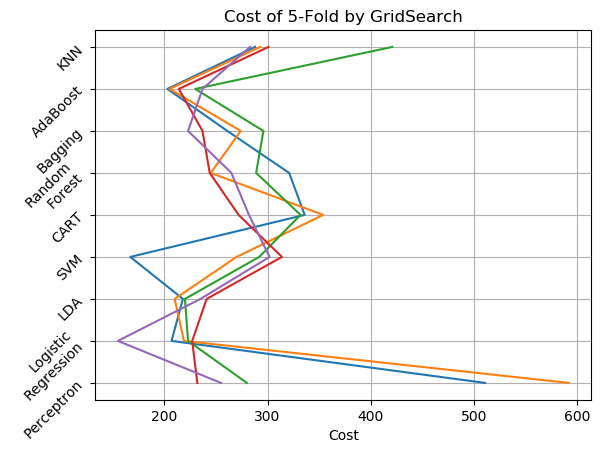

In [300]:
mpl.rcdefaults()
for i in range(1,6):
    plt.plot(ev_grid_cost_fold['Fold_'+str(i)], ev_grid_model)
plt.xlabel('Cost')
plt.grid()
plt.yticks(rotation=45)
plt.title('Cost of 5-Fold by GridSearch')
plt.show()

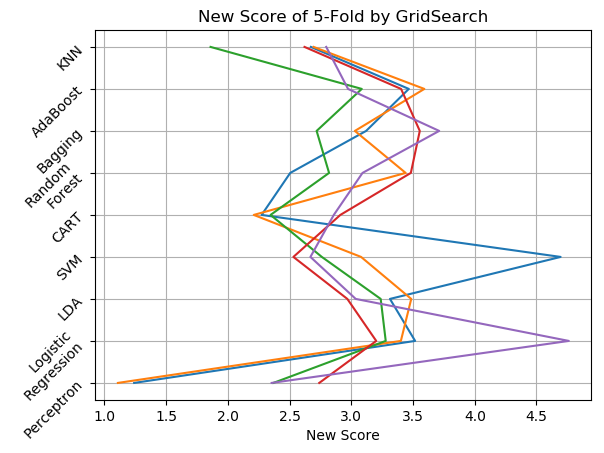

In [301]:
mpl.rcdefaults()
for i in range(1,6):
    plt.plot(ev_grid_new_fold['Fold_'+str(i)], ev_grid_model)
plt.xlabel('New Score')
plt.grid()
plt.yticks(rotation=45)
plt.title('New Score of 5-Fold by GridSearch')
plt.show()

# 최종 성능 평가

In [324]:
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=1112)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
cfm = confusion_matrix(y_test, y_pred)
print('<Ada Boost>')
print('Confusion Matrix')
print(cfm)
cost = np.multiply(cfm,cost_matrix).sum()
accuracy = accuracy_score(y_test, y_pred)
new = accuracy / (cost/1000)
print('Accuracy : %.4f'%accuracy)
print('Cost :', cost)
print('New Score : %.4f'%new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Ada Boost>
Confusion Matrix
[[351  89   2   0]
 [ 61 199  10   0]
 [  4  67  31   1]
 [  0  27  10  15]]
Accuracy : 0.6874
Cost : 319
New Score : 2.1549


In [323]:
bg = BaggingClassifier(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=82, n_jobs=None, oob_score=False, random_state=1112,
          verbose=0, warm_start=False)
bg.fit(X_train_std, y_train)
y_pred = bg.predict(X_test_std)
cfm = confusion_matrix(y_test, y_pred)
print('<Bagging>')
print('Confusion Matrix')
print(cfm)
cost = np.multiply(cfm,cost_matrix).sum()
accuracy = accuracy_score(y_test, y_pred)
new = accuracy / (cost/1000)
print('Accuracy : %.4f'%accuracy)
print('Cost :', cost)
print('New Score : %.4f'%new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Bagging>
Confusion Matrix
[[401  36   5   0]
 [ 42 207  18   3]
 [  4  30  64   5]
 [  0   8   7  37]]
Accuracy : 0.8178
Cost : 262
New Score : 3.1212


In [322]:
svm = SVC(gamma='auto', decision_function_shape='ovo')
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
cfm = confusion_matrix(y_test, y_pred)
print('<SVM>')
print('Confusion Matrix')
print(cfm)
cost = np.multiply(cfm,cost_matrix).sum()
accuracy = accuracy_score(y_test, y_pred)
new = accuracy / (cost/1000)
print('Accuracy : %.4f'%accuracy)
print('Cost :', cost)
print('New Score : %.4f'%new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<SVM>
Confusion Matrix
[[398  43   1   0]
 [ 61 200   9   0]
 [  7  50  45   1]
 [  1  12  12  27]]
Accuracy : 0.7728
Cost : 237
New Score : 3.2607


In [321]:
lda = LDA(n_components=1, priors=None, shrinkage=None,
          solver='svd', store_covariance=False, tol=0.0001)
lda.fit(X_train_std, y_train)
y_pred = lda.predict(X_test_std)
cfm = confusion_matrix(y_test, y_pred)
print('<LDA>')
print('Confusion Matrix')
print(cfm)
cost = np.multiply(cfm,cost_matrix).sum()
accuracy = accuracy_score(y_test, y_pred)
new = accuracy / (cost/1000)
print('Accuracy : %.4f'% accuracy)
print('Cost :', cost)
print('New Score : %.4f'%new)

<LDA>
Confusion Matrix
[[399  37   6   0]
 [ 82 156  25   7]
 [ 11  54  22  16]
 [  2  19   4  27]]
Accuracy : 0.6967
Cost : 415
New Score : 1.6787


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [320]:
lg = LogisticRegression(C=10.0, class_weight='', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1112, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
lg.fit(X_train_std, y_train)
y_pred = lg.predict(X_test_std)
cfm = confusion_matrix(y_test, y_pred)
print('<Logistic Regression>')
print('Confusion Matrix')
print(cfm)
cost = np.multiply(cfm,cost_matrix).sum()
accuracy = accuracy_score(y_test, y_pred)
new = accuracy / (cost/1000)
print('Accuracy : %.4f'%accuracy)
print('Cost :', cost)
print('New Score :%.4f'%new)

<Logistic Regression>
Confusion Matrix
[[409  32   1   0]
 [ 82 174  12   2]
 [ 11  64  17  11]
 [  2  15   1  34]]
Accuracy : 0.7313
Cost : 293
New Score :2.4958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
